In [1]:
from transit_model import TransitModel, load_masked_lc
import lightkurve as lk
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [2]:
ID = 2854948

tm = TransitModel(f'KIC {ID}', window=21)
tm.init_optimizer()
tm.fit_model()
tm.fit_model_period(period_guesses=[tm.bls_period/4, tm.bls_period/2, tm.bls_period, tm.bls_period*2], dur_est=0.02)
tm.apply_transit_mask()
tm.save_masked_lcs()

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

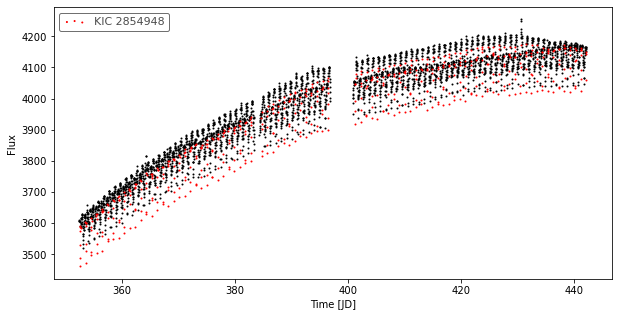

In [3]:
tmask = load_masked_lc(f'./saved_lightcurves/KIC_{ID}_tmasked.npy', meta=tm.meta)
rmask = load_masked_lc(f'./saved_lightcurves/KIC_{ID}_rmasked.npy')

fig, ax = plt.subplots(figsize=(10,5), sharey=True)
rmask.scatter(c='black', ax=ax)
tmask.scatter(c='red', ax=ax)

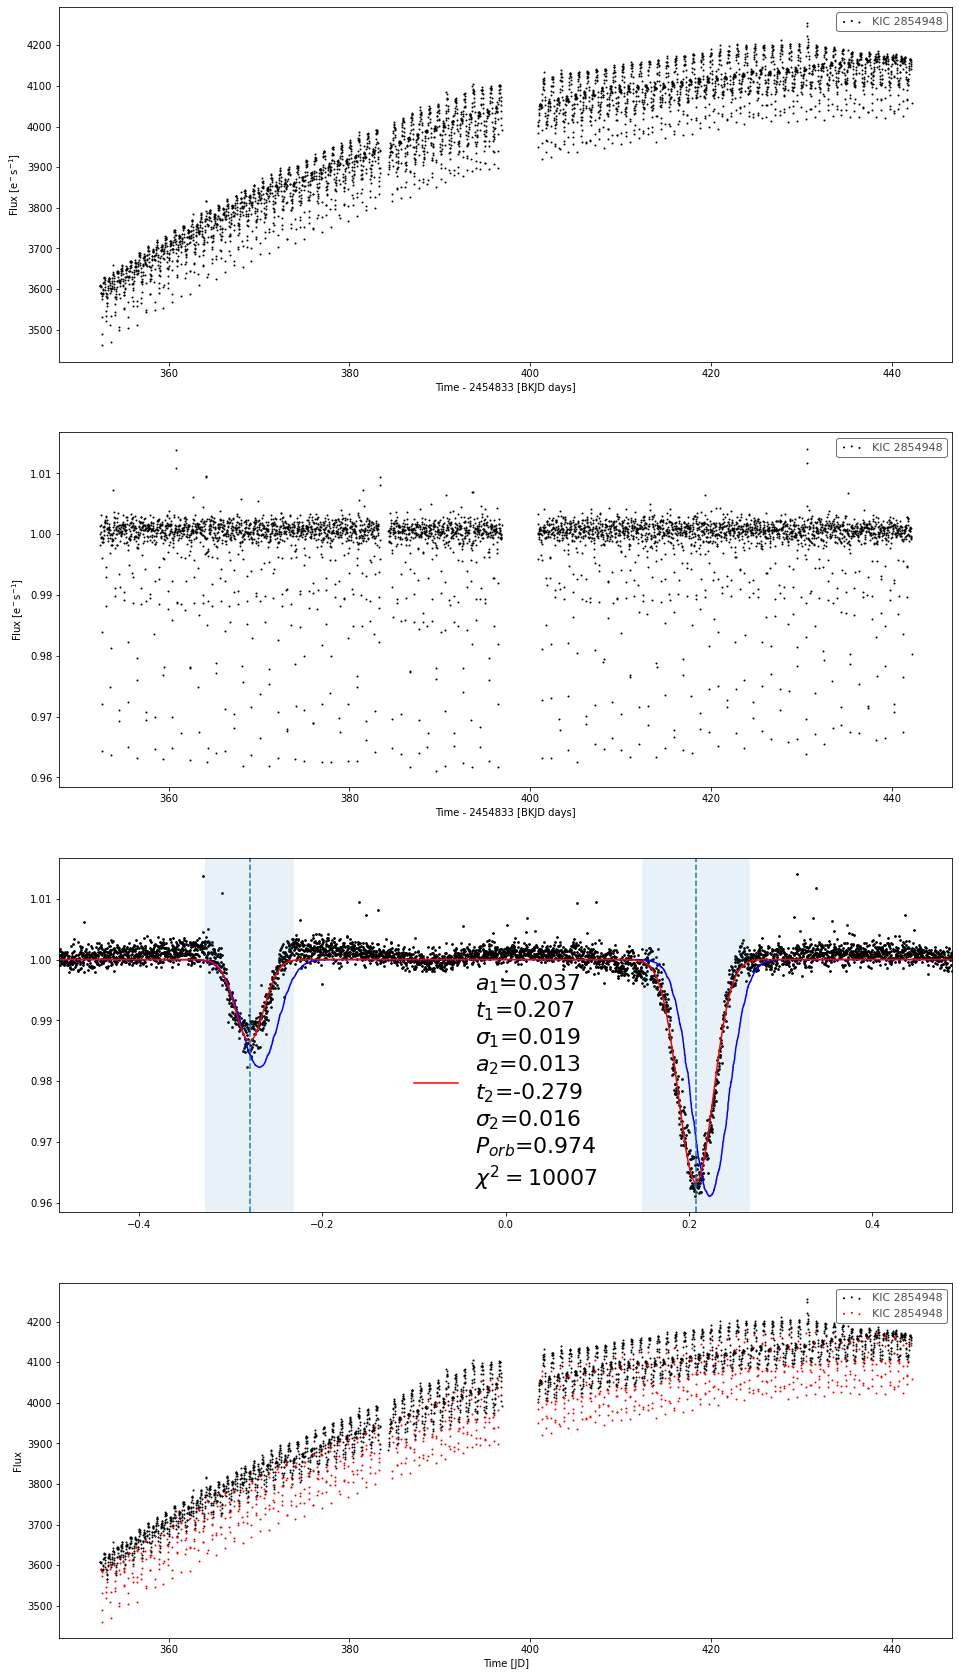

In [4]:
tm.plot_best_fit()